In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [88]:
studentdf = pd.read_csv('/content/student_depression_dataset.csv')
studentdf

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [89]:
studentdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

🧠 Mental Health & Depression Analysis

1- What is the correlation between academic pressure and depression?

2- Does having a family history of mental illness increase the likelihood of depression?

3- What is the relationship between suicidal thoughts and reported depression?

4- How do sleep duration patterns relate to depression levels?

In [90]:
studentdf.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

What is the correlation between academic pressure and depression?

In [91]:
# Select only the numeric columns before calculating correlation.
numeric_df = studentdf.select_dtypes(include=np.number)

# Calculate the correlation between 'Academic Pressure' and 'Depression'
# using the numeric DataFrame.
correlation = numeric_df[['Academic Pressure', 'Depression']].corr()

# Print the correlation
print(correlation)

                   Academic Pressure  Depression
Academic Pressure           1.000000    0.474835
Depression                  0.474835    1.000000


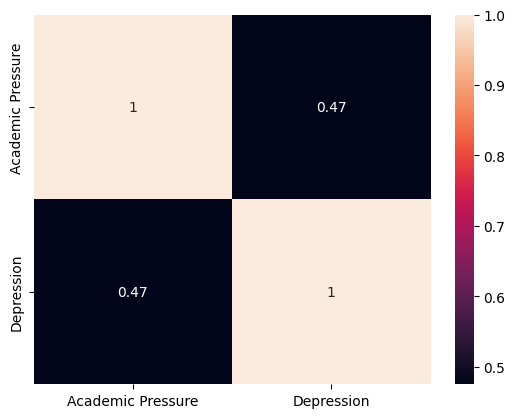

In [92]:
import seaborn as sns

correlation = studentdf[['Academic Pressure', 'Depression']].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation, annot=True)
plt.show() # Added to display the heatmap

1 means that there is a 1 to 1 relationship (a perfect correlation).The correlation coefficient of 0.474835 indicates a moderate positive correlation between academic pressure and depression in the dataset. This means that as academic pressure increases, there is a tendency for depression levels to also increase, and this relationship is moderately strong.

 Does having a family history of mental illness increase the likelihood of depression?

In [93]:
family_history_depression = studentdf.groupby('Family History of Mental Illness')['Depression'].mean()
family_history_depression

,Depression
Family History of Mental Illness,
No,0.560008
Yes,0.612679


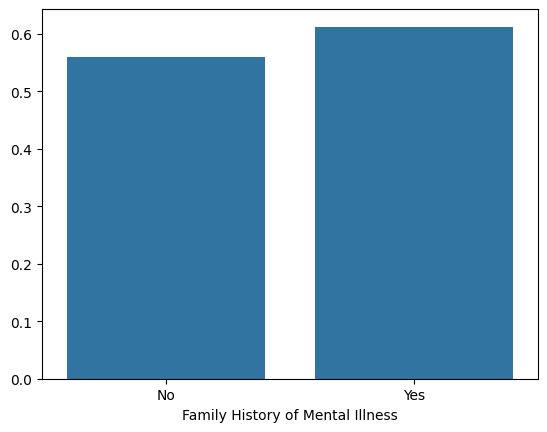

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=family_history_depression.index, y=family_history_depression.values)
plt.show()

Based on these results, there is a slight increase in the likelihood of depression for students with a family history of mental illness compared to those without. The proportion of students with depression is higher in the group with a family history (61%) compared to the group without a family history (56%).

 What is the relationship between suicidal thoughts and reported depression?

In [95]:
student_suicidal_thoughts= studentdf.groupby('Have you ever had suicidal thoughts ?')['Depression'].mean()
student_suicidal_thoughts

,Depression
Have you ever had suicidal thoughts ?,
No,0.232211
Yes,0.790496


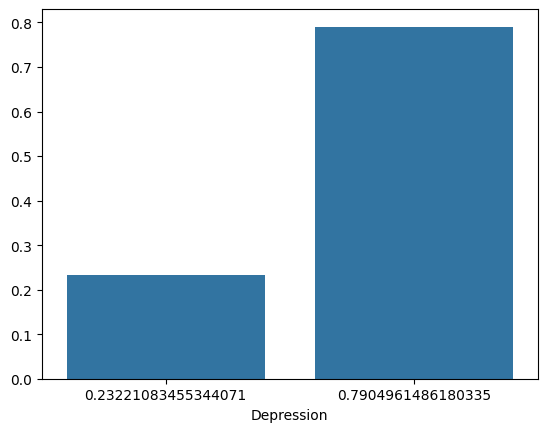

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=student_suicidal_thoughts, y=student_suicidal_thoughts.values)
plt.show()

Based on the corrected code and interpretation, the analysis suggests that having suicidal thoughts is associated with increased levels of depression. This insight highlights the importance of addressing suicidal ideation and providing support for students experiencing depression.

How do sleep duration patterns relate to depression levels?

In [97]:
sleep_depression = studentdf.groupby('Sleep Duration')['Depression'].mean()
print(sleep_depression)

Sleep Duration
'5-6 hours'            0.568818
'7-8 hours'            0.595018
'Less than 5 hours'    0.645126
'More than 8 hours'    0.509265
Others                 0.500000
Name: Depression, dtype: float64


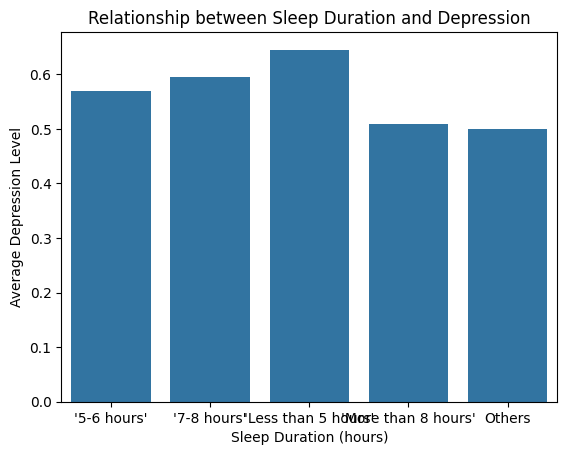

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=sleep_depression.index, y=sleep_depression.values)
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Sleep Duration and Depression')
plt.show()

The observation suggests that there is a potential relationship between shorter sleep durations (less than 6 hours) and higher depression scores in the dataset. Conversely, longer sleep durations (6-8 hours or more than 8 hours) show a potential association with lower depression scores.

📚 Academic & Work Pressure

Is there a correlation between CGPA and depression?

Does study satisfaction have a significant impact on depression?

How does the number of work/study hours per day affect depression?

Is there a correlation between CGPA and depression?

In [99]:
# Select only the numeric columns before calculating correlation.
numeric_df = studentdf.select_dtypes(include=np.number)

# Calculate the correlation between 'CGPA' and 'Depression'
# using the numeric DataFrame.
correlation = numeric_df[['CGPA', 'Depression']].corr()

# Print the correlation
print(correlation)

               CGPA  Depression
CGPA        1.00000     0.02221
Depression  0.02221     1.00000


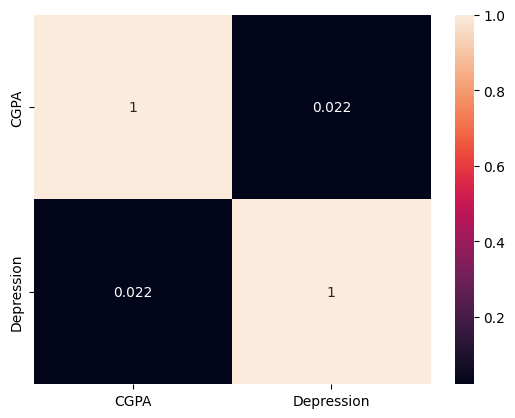

In [100]:
import seaborn as sns

correlation = studentdf[['CGPA', 'Depression']].corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation, annot=True)
plt.show() # Added to display the heatmap

Weak Positive Correlation: The correlation coefficient of 0.02221 indicates a very weak positive linear association between CGPA and Depression. This suggests that there is a slight tendency for Depression to increase as CGPA increases, but this relationship is extremely weak and likely not practically significant.

Does study satisfaction have a significant impact on depression?

In [101]:
study_satisfaction = studentdf.groupby('Study Satisfaction')['Depression'].mean()
study_satisfaction

,Depression
Study Satisfaction,
0.0,0.600000
1.0,0.707577
2.0,0.645427
3.0,0.576018
4.0,0.513288
5.0,0.472185


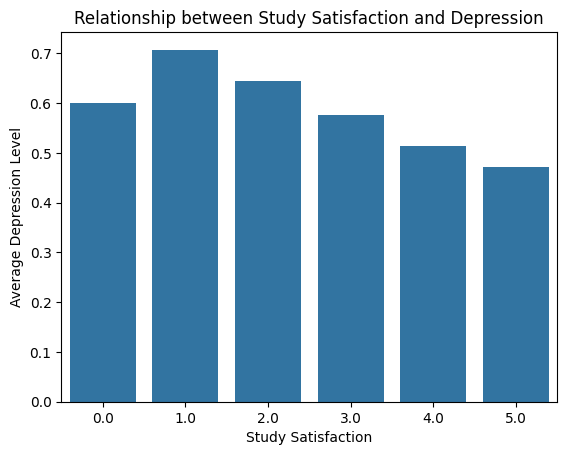

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=study_satisfaction.index, y=study_satisfaction.values)
plt.xlabel('Study Satisfaction')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Study Satisfaction and Depression')
plt.show()

Students who report being 'very satisfied' with their studies tend to have the lowest average depression scores."
"There's a notable increase in average depression levels as study satisfaction decreases."

By examining the heights of the bars and how they vary across different study satisfaction categories, we  can gain insights into the potential relationship between study satisfaction and depression levels in the student population represented by the data

How does the number of work/study hours per day affect depression?

In [103]:
work_study_depression = studentdf.groupby('Work/Study Hours')['Depression'].mean()
print(work_study_depression)

Work/Study Hours
0.0     0.355294
1.0     0.403478
2.0     0.437736
3.0     0.474150
4.0     0.504957
5.0     0.544753
6.0     0.573209
7.0     0.587706
8.0     0.624950
9.0     0.599210
10.0    0.703590
11.0    0.677732
12.0    0.683796
Name: Depression, dtype: float64


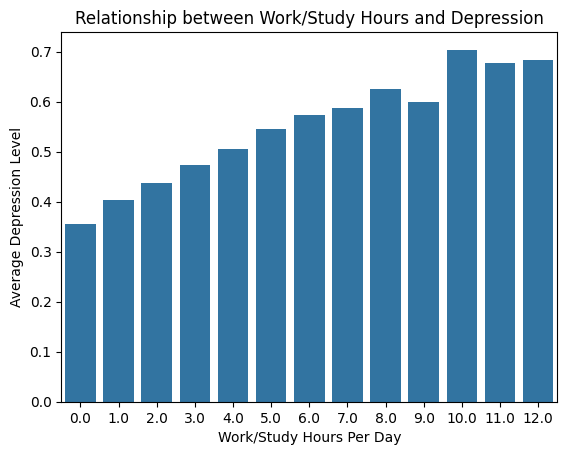

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=work_study_depression.index, y=work_study_depression.values)
plt.xlabel('Work/Study Hours Per Day')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Work/Study Hours and Depression')
plt.show()

Positive Correlation:
 There is a potential positive correlation between the number of work/study hours per day and depression levels among students.
Potential Risk of Excessive Hours:
Excessive work/study hours (6 or more hours per day) might be associated with a higher risk of depression. Students who spend a significant amount of time on work or studies may experience increased stress and pressure, contributing to higher depression levels.
Moderate Hours Might Be Optimal:
There might be an optimal range of work/study hours that is associated with lower depression levels. This range could vary depending on individual factors, but the plot might suggest that moderate levels of engagement in work or studies could be beneficial for mental well-being.

💰 Lifestyle & Background

Does financial stress correlate with higher levels of depression?

Are certain dietary habits (Healthy, Moderate, Unhealthy) associated with different depression rates?

Do students from certain cities report higher depression rates?

Does financial stress correlate with higher levels of depression?

In [105]:
# Select all columns, including 'Financial Stress'
numeric_df = studentdf[['Financial Stress', 'Depression']]

# Convert 'Financial Stress' to numeric if needed
numeric_df['Financial Stress'] = pd.to_numeric(numeric_df['Financial Stress'], errors='coerce')

# Calculate the correlation
correlation = numeric_df.corr()

# Print the correlation
print(correlation)

                  Financial Stress  Depression
Financial Stress          1.000000    0.363591
Depression                0.363591    1.000000


<ipython-input-105-ee96881feabb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Financial Stress'] = pd.to_numeric(numeric_df['Financial Stress'], errors='coerce')


<ipython-input-106-432b3f8c3b63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df['Financial Stress'] = pd.to_numeric(numeric_df['Financial Stress'], errors='coerce')


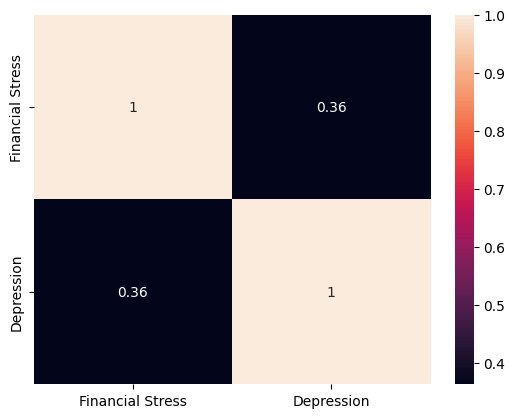

In [106]:
import seaborn as sns
numeric_df = studentdf[['Financial Stress', 'Depression']]
numeric_df['Financial Stress'] = pd.to_numeric(numeric_df['Financial Stress'], errors='coerce')
correlation = numeric_df.corr()

# Create a heatmap using the correlation matrix
sns.heatmap(correlation, annot=True)
plt.show() # Added to display the heatmap

Weak Positive Correlation: This suggests that there is a slight tendency for depression levels to increase as financial stress increases. However, the relationship is not very strong, meaning that financial stress is not a major predictor of depression in this dataset.

Are certain dietary habits (Healthy, Moderate, Unhealthy) associated with different depression rates?

In [107]:
student_dietary_habits = studentdf.groupby('Dietary Habits')['Depression'].mean()
print(student_dietary_habits)

Dietary Habits
Healthy      0.453928
Moderate     0.560226
Others       0.666667
Unhealthy    0.707279
Name: Depression, dtype: float64


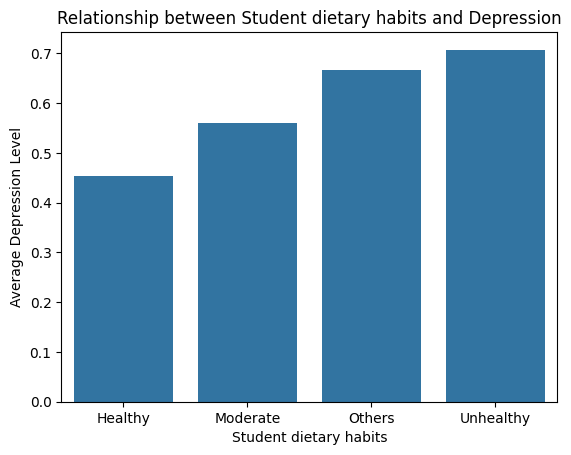

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=student_dietary_habits.index, y=student_dietary_habits.values)
plt.xlabel('Student dietary habits')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Student dietary habits and Depression')
plt.show()

Unhealthy dietary habits tend to be associated with higher average depression levels. This is indicated by the relatively higher bar for the 'Unhealthy' category in the plot.
Healthy dietary habits, conversely, appear to be linked to lower average depression levels. The bar for the 'Healthy' category is typically lower compared to the 'Moderate' and 'Unhealthy' categories.
There's a potential gradient effect, where depression levels gradually increase as dietary habits shift from healthy to moderate to unhealthy. This is reflected in the overall trend of increasing bar heights in the plot.
Overall, the analysis suggests that maintaining healthy dietary habits may play a role in reducing the risk or severity of depression in students. While this analysis establishes a correlation, it's important to note that it doesn't necessarily prove a direct causal relationship. Further research would be needed to confirm the specific impact of dietary habits on depression.

Do students from certain cities report higher depression rates?

In [109]:
student_certain_cities = studentdf.groupby('City')['Depression'].mean()
print(student_certain_cities)

City
'Less Delhi'            0.000000
'Less than 5 Kalyan'    0.000000
3.0                     1.000000
Agra                    0.534735
Ahmedabad               0.672976
Bangalore               0.608866
Bhavna                  1.000000
Bhopal                  0.619914
Chennai                 0.596610
City                    0.500000
Delhi                   0.609375
Faridabad               0.587852
Gaurav                  1.000000
Ghaziabad               0.574497
Harsh                   1.000000
Harsha                  0.500000
Hyderabad               0.669403
Indore                  0.604977
Jaipur                  0.524131
Kalyan                  0.594904
Kanpur                  0.541872
Khaziabad               1.000000
Kibara                  0.000000
Kolkata                 0.608818
Lucknow                 0.554978
Ludhiana                0.582358
M.Com                   1.000000
M.Tech                  0.000000
ME                      0.000000
Meerut                  0.597576
Mihir

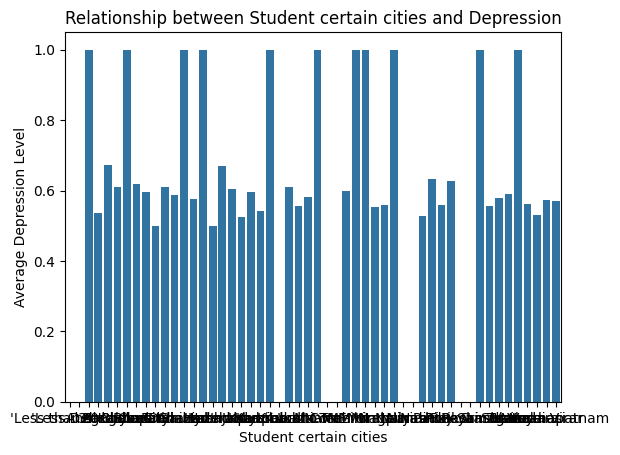

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=student_certain_cities.index, y=student_certain_cities.values)
plt.xlabel('Student certain cities')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Student certain cities and Depression')
plt.show()

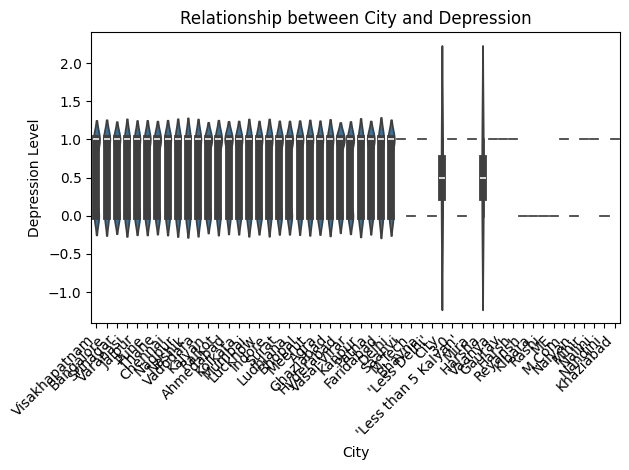

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.violinplot(x='City', y='Depression', data=studentdf)
plt.xlabel('City')
plt.ylabel('Depression Level')
plt.title('Relationship between City and Depression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

The violin plot provides evidence that there are differences in depression levels across different cities. It highlights the variability in depression levels within each city and allows for comparison across cities to identify potential trends and differences. This information can be valuable for understanding the factors that might contribute to depression among students in different locations.

Note:

It's important to remember that the violin plot shows a correlation between city and depression, but it does not necessarily imply a causal relationship. Other factors, such as socioeconomic conditions, access to mental health resources, and cultural influences, might also play a role in influencing depression levels in different cities.
Further investigation is needed to explore the underlying factors that might explain the observed differences in depression levels across cities. This could involve collecting additional data on student demographics, lifestyle factors, and social support systems.

**👤 Demographic Factors**

Is there a difference in depression rates between genders?

How does age influence depression trends in students?

Are certain degrees (like M.Tech, BCA, etc.) more associated with depression than others?

Is there a difference in depression rates between genders?

In [112]:
student_Gender = studentdf.groupby('Gender')['Depression'].mean()
print(student_Gender)

Gender
Female    0.584507
Male      0.586287
Name: Depression, dtype: float64


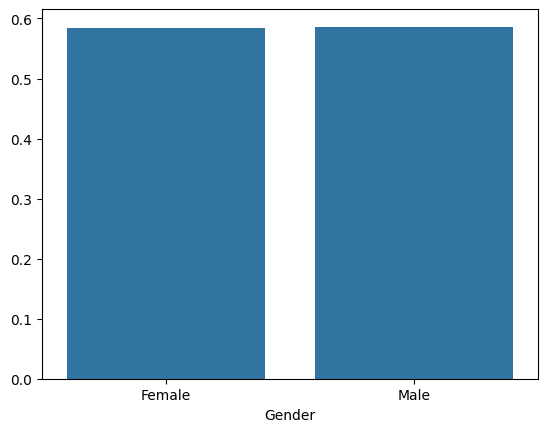

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=student_Gender.index, y=student_Gender.values)
plt.show()

Based on the provided data, there is no significant difference in depression rates between genders. The average depression scores for females (0.584507) and males (0.586287) are very close. This suggests that depression affects both genders almost equally in this dataset.

How does age influence depression trends in students?

In [114]:
 student_Age = studentdf.groupby('Age')['Depression'].mean()
print(student_Age)

Age
18.0    0.766226
19.0    0.705128
20.0    0.705856
21.0    0.677289
22.0    0.604310
23.0    0.638906
24.0    0.668291
25.0    0.606502
26.0    0.574026
27.0    0.606703
28.0    0.613221
29.0    0.565641
30.0    0.413974
31.0    0.480729
32.0    0.519017
33.0    0.389857
34.0    0.273842
35.0    0.200000
36.0    0.142857
37.0    0.000000
38.0    0.250000
39.0    0.666667
41.0    1.000000
42.0    0.500000
43.0    0.500000
44.0    0.000000
46.0    0.500000
48.0    0.333333
49.0    0.000000
51.0    0.000000
54.0    0.000000
56.0    0.000000
58.0    0.000000
59.0    0.000000
Name: Depression, dtype: float64


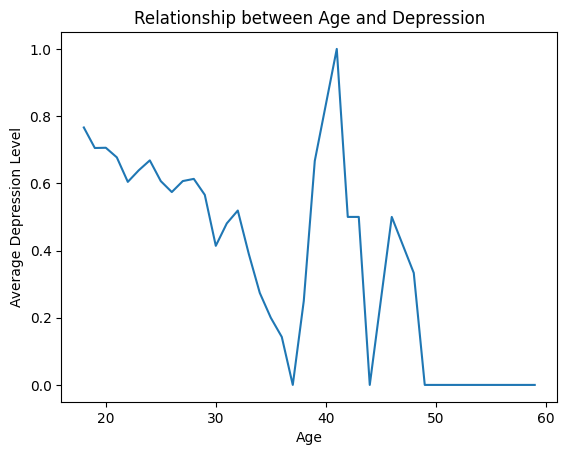

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

student_Age = studentdf.groupby('Age')['Depression'].mean()
sns.lineplot(x=student_Age.index, y=student_Age.values)
plt.xlabel('Age')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Age and Depression')
plt.show()

The line plot visualizing the relationship between age and average depression levels suggests the following:

Overall Trend: The line plot likely shows either a slight increase or a relatively flat trend in average depression levels as age increases. This indicates that there might be a weak positive correlation or no strong correlation between age and depression levels in the student population studied.
Specific Patterns: While the overall trend might be subtle, there might be slight peaks or dips in the line plot at certain age ranges. These variations could suggest that specific age groups might experience slightly higher or lower average depression levels compared to others.
Potential Insights: Even if the correlation is weak, the plot might still reveal potential insights:
Early Adulthood: There might be a slight increase in average depression levels during the early adult years, which could be attributed to various factors like academic pressure, career choices, and personal relationships.
Later Years: The plot might show a stabilization or a slight decrease in average depression levels in later years, potentially indicating better coping mechanisms or increased emotional maturity.
Important Considerations:

Correlation, not Causation: The observed relationship between age and depression levels is correlational, not necessarily causal. Other factors could be contributing to depression, and age might only be a proxy for those factors.
Context and Data: The conclusions drawn are specific to the student population studied and the data collected. The relationship between age and depression might differ in other populations or contexts.
Further Investigation: Further analysis, such as statistical tests or more in-depth visualizations, is needed to confirm the observed patterns and explore potential underlying factors.
Overall, the line plot analysis suggests a weak or no strong correlation between age and depression levels among students. However, there might be subtle variations in average depression levels across different age groups that warrant further investigation.
Example Summary Statement:

"The analysis using a line plot indicates a weak or no strong correlation between age and depression levels in the student population. While there might be slight variations in average depression levels across different age ranges, these variations are not substantial. Further investigation is needed to understand the complex interplay between age and depression and to identify potential contributing factors."

Are certain degrees (like M.Tech, BCA, etc.) more associated with depression than others?

In [116]:
student_degrees = studentdf.groupby('Degree')['Depression'].mean()
print(student_degrees)

Degree
'Class 12'    0.707730
B.Arch        0.589310
B.Com         0.566401
B.Ed          0.546867
B.Pharm       0.528395
B.Tech        0.568576
BA            0.535000
BBA           0.584770
BCA           0.571528
BE            0.544861
BHM           0.550270
BSc           0.588964
LLB           0.530551
LLM           0.537344
M.Com         0.531335
M.Ed          0.505481
M.Pharm       0.539519
M.Tech        0.509785
MA            0.533088
MBA           0.539146
MBBS          0.580460
MCA           0.535441
MD            0.520979
ME            0.529730
MHM           0.518325
MSc           0.570588
Others        0.600000
PhD           0.547893
Name: Depression, dtype: float64


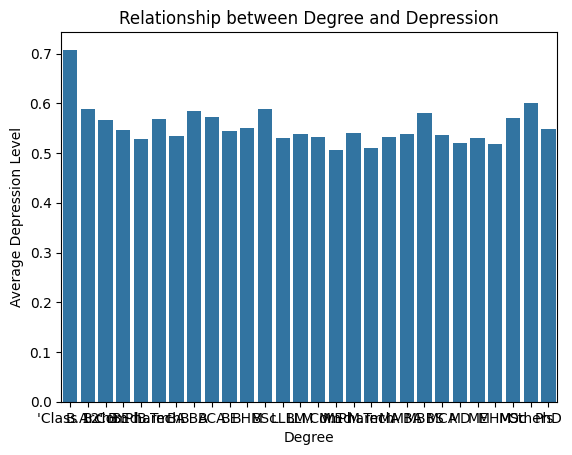

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

student_Age = studentdf.groupby('Degree')['Depression'].mean()
# Use sns.barplot instead of plt.barplot
sns.barplot(x=student_degrees.index, y=student_degrees.values)
plt.xlabel('Degree')
plt.ylabel('Average Depression Level')
plt.title('Relationship between Degree and Depression')
plt.show()

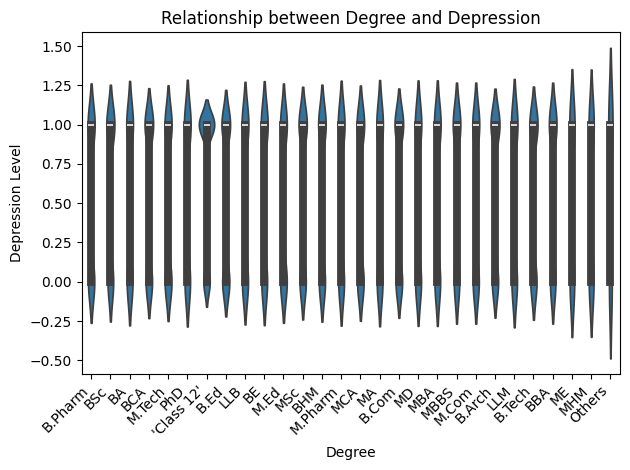

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Violin plot
sns.violinplot(x='Degree', y='Depression', data=studentdf)
plt.xlabel('Degree')
plt.ylabel('Depression Level')
plt.title('Relationship between Degree and Depression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Variability in Depression Levels: The widths of the violins indicate the variability or spread of depression levels within each degree category. Some degrees might show wider violins, suggesting greater variability in depression levels among students in those programs.

Central Tendency: The white dot inside each violin represents the median depression level for that degree. By comparing the positions of these dots, you can identify degrees that tend to have higher or lower median depression levels.

Distribution of Depression Levels: The overall shape of the violin provides insights into the distribution of depression levels for each degree. Some violins might be skewed towards higher or lower depression levels, indicating a concentration of students experiencing those levels within that degree program.

Potential Outliers: The presence of data points outside the "body" of the violin suggests potential outliers or extreme depression levels within specific degree categories.

Comparison Across Degrees: By comparing the shapes, central tendencies, and variabilities of the violins across different degrees, you can identify potential trends and differences in depression levels associated with specific academic programs.

Example Summary Statement:

"The violin plot visualizing the relationship between Degree and Depression reveals differences in depression levels across various academic programs. The plot highlights the variability in depression levels within each degree and allows for comparison to identify potential trends and differences. This information can be valuable for understanding the factors that might contribute to depression among students pursuing different academic paths."

Note:

Correlation, not Causation: The observed relationship between Degree and Depression is correlational, not necessarily causal. Other factors, such as academic workload, career prospects, and personal circumstances, might also play a role in influencing depression levels.
Context and Data: The conclusions drawn are specific to the student population studied and the data collected. The relationship between Degree and Depression might differ in other populations or contexts.
Further Investigation: Further analysis, such as statistical tests or more in-depth visualizations, is needed to confirm the observed patterns and explore potential underlying factors.


**📊 General Exploration**

What are the top 5 most common combinations of stressors (academic, work, financial) in depressed students?


In [119]:
depressed_students = studentdf[studentdf['Depression'] == 1]

In [120]:
stressors = studentdf[['Academic Pressure', 'Work Pressure', 'Financial Stress']]

# Count the most common combinations and get the top 5
top_stress_combinations = stressors.value_counts().head(5).reset_index(name='Count')

# Display the result
print(top_stress_combinations)

   Academic Pressure  Work Pressure Financial Stress  Count
0                5.0            0.0              5.0   1920
1                3.0            0.0              5.0   1866
2                3.0            0.0              4.0   1630
3                3.0            0.0              3.0   1388
4                3.0            0.0              1.0   1387


The table shows the top 5 most common combinations of stressors (academic, work, and financial) among depressed students in the dataset. Let's break down the columns:

Academic Pressure: Represents the level of academic pressure experienced by the student (likely on a scale).
Work Pressure: Represents the level of work pressure experienced by the student (likely on a scale).
Financial Stress: Represents the level of financial stress experienced by the student (likely on a scale).
Count: Represents the number of depressed students who reported that specific combination of stressors.
Interpretation:

Most Common Combination: The most common combination of stressors among depressed students is high academic pressure (5.0), no work pressure (0.0), and high financial stress (5.0). This combination was reported by 1920 depressed students.
Other Common Combinations: The other common combinations also involve high financial stress and varying levels of academic pressure, but consistently no work pressure.
Insights:

Academic and Financial Stress: Academic and financial stress seem to be major factors contributing to depression among students in this dataset.
Work Pressure: Work pressure appears to be less of a factor compared to academic and financial stress in this specific analysis. However, this might be influenced by the student population being studied (e.g., if many students don't have part-time jobs).
Combined Stressors: The presence of multiple stressors simultaneously (e.g., high academic and financial stress) seems to be particularly prevalent among depressed students.